In [1]:
import import_ipynb
import kbo_test_v4_0_4 as testpy

importing Jupyter notebook from kbo_test_v4_0_4.ipynb


In [2]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#import plotly.graph_objs as go
#import plotly.offline as py

In [3]:
# matplotlib 한글 출력..
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'  # 내가 원하는 폰트로 따로 설정이 가능
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [4]:
df_train, df_test = testpy.df_train_data(2020)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [5]:
df_hit_mvp = df_train[(df_train.mvp == 1) & (df_train.player_IP == 0)].reset_index(drop=True)
df_pit_mvp = df_train[(df_train.mvp == 1) & (df_train.player_IP != 0)].reset_index(drop=True)
df_hit_all = df_train[(df_train.mvp == 0) & (df_train.player_IP == 0)].reset_index(drop=True)
df_pit_all = df_train[(df_train.mvp == 0) & (df_train.player_IP != 0)].reset_index(drop=True)

In [6]:
df_hit_mvp = df_hit_mvp.drop(['player_ERA', 'player_GP', 'player_CG', 'player_SHO',
       'player_W', 'player_L', 'player_SV', 'player_HLD', 'player_WPCT',
       'player_TBF', 'player_IP', 'player_HP', 'player_HRP', 'player_BBP',
       'player_HBPP', 'player_SOP', 'player_RP', 'player_ER', 'player_name',
       'mvp','player_2B','player_3B'], axis=1)

df_hit_all = df_hit_all.drop(['player_ERA', 'player_GP', 'player_CG', 'player_SHO',
       'player_W', 'player_L', 'player_SV', 'player_HLD', 'player_WPCT',
       'player_TBF', 'player_IP', 'player_HP', 'player_HRP', 'player_BBP',
       'player_HBPP', 'player_SOP', 'player_RP', 'player_ER', 'player_name',
       'mvp','player_2B','player_3B'], axis=1)


df_pit_mvp = df_pit_mvp.drop(['player_AVG', 'player_G', 'player_PA', 'player_AB',
       'player_RH', 'player_HH', 'player_2B', 'player_3B', 'player_HRH',
       'player_TB', 'player_RBI', 'player_SB', 'player_CS', 'player_BBH',
       'player_HBPH', 'player_SOH', 'player_GDP', 'player_SLG', 'player_OBP',
       'player_E','mvp','player_name'],axis=1)
df_pit_all = df_pit_all.drop(['player_AVG', 'player_G', 'player_PA', 'player_AB',
       'player_RH', 'player_HH', 'player_2B', 'player_3B', 'player_HRH',
       'player_TB', 'player_RBI', 'player_SB', 'player_CS', 'player_BBH',
       'player_HBPH', 'player_SOH', 'player_GDP', 'player_SLG', 'player_OBP',
       'player_E','mvp','player_name'],axis=1)

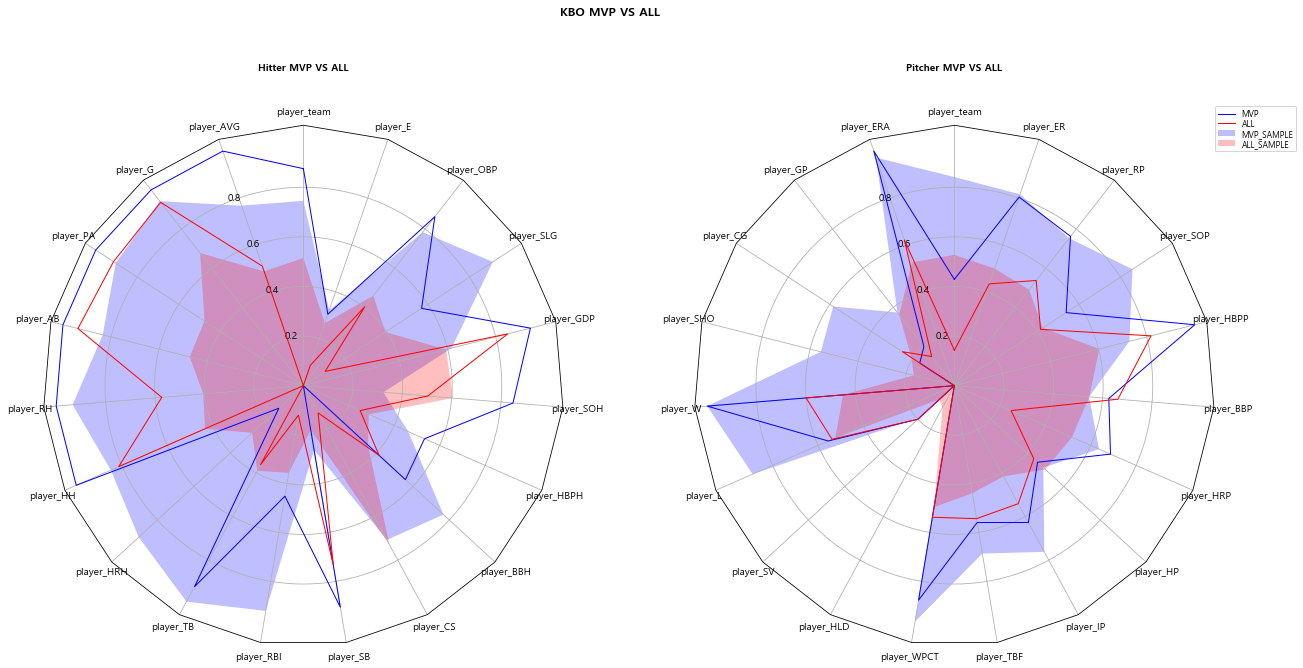

In [10]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    
    
   
    data = [
        list(df_hit_mvp),
        list(df_pit_mvp),
        ('Hitter MVP VS ALL', [df_hit_mvp.mean().tolist(), df_hit_all.mean().tolist(), 
                               df_hit_mvp.sample().values.tolist()[0], df_hit_all.sample().values.tolist()[0]]),
        ('Pitcher MVP VS ALL', [df_pit_mvp.mean().tolist(), df_pit_all.mean().tolist(), 
                                df_pit_mvp.sample().values.tolist()[0], df_pit_all.sample().values.tolist()[0]])
       
       
    ]
 
    return data


if __name__ == '__main__':
    
    theta = [radar_factory(19, frame='polygon'),radar_factory(19, frame='polygon')]

    data = example_data()
    spoke_labels = [data.pop(0), data.pop(0)]

    fig, axs = plt.subplots(figsize=(21, 21), nrows=1, ncols=2,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.02, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'b', 'r']
    # Plot the four cases from the example data on separate axes
    i = 0
    for ax, (title, case_data) in zip(axs.flat, data):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        j = 0
        for d, color in zip(case_data, colors):
            
            if j in [0,1]:
                ax.fill(theta[i], d, facecolor=color, alpha=0.25)
            else:
                ax.plot(theta[i], d, color=color,linewidth=1)
            j+=1
 #           
        ax.set_varlabels(spoke_labels[i])
        i += 1
        
    # add legend relative to top-left plot
    labels = ('MVP', 'ALL', 'MVP_SAMPLE', 'ALL_SAMPLE')
    legend = axs[1].legend(labels, loc=(1, .95),
                              labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.695, 'KBO MVP VS ALL',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()

In [8]:
(df_hit_mvp.mean() - df_hit_all.mean()).sort_values(ascending=False)

player_HRH     0.621272
player_TB      0.599732
player_RBI     0.564502
player_RH      0.528575
player_SLG     0.517493
player_PA      0.427772
player_HH      0.414877
player_BBH     0.413724
player_AB      0.361924
player_OBP     0.324410
player_AVG     0.280616
player_G       0.264728
player_team    0.230168
player_HBPH    0.173984
player_SB      0.081564
player_E       0.054679
player_GDP     0.022986
player_CS     -0.022372
player_SOH    -0.281754
dtype: float64

In [9]:
(df_pit_mvp.mean() - df_pit_all.mean()).sort_values(ascending=False)

player_W       0.549606
player_WPCT    0.468684
player_ERA     0.446766
player_SOP     0.432228
player_SHO     0.386900
player_CG      0.376302
player_L       0.364115
player_IP      0.346040
player_ER      0.316291
player_team    0.313811
player_RP      0.262652
player_TBF     0.246593
player_HBPP    0.125223
player_HRP     0.119397
player_SV      0.107019
player_GP      0.012070
player_BBP    -0.001049
player_HP     -0.011027
player_HLD    -0.099821
dtype: float64